## Guided Capstone Project Report

Big Mountain Ski resort currently prices tickets based on the market average of ski resort ticket prices. The client wants a pricing strategy that is informed by the significance of its facilities. Management wants to create an investment strategy that maximizes the value of their equipment.

Before I constructed a model, I considered how useful the mean value is as a predictor. The average price ticket, 63.81 dollars, had an absolute error of nearly 19 dollars. This means that our average ticket price across all resorts will range from 44 dollars to 82 dollars. Before constructing the initial model, I imputed the missing values in the dataset with the median of each feature and scaled the data to control for differing orders of magnitude. Some features, or columns, in our dataset had multicollinearity. Multicollinearity occurs when two predictor variables are highly linearly correlated. This is a problem since we assume that our predictor variables are independent variables. If we want to create a model that can simulate possible changes in any feature, such as an increase in chair lifts, then we want to make sure that the new outcome is only affected by changes in the chair lift variable. Strongly correlated variables will obfuscate the source of the effect and limit the model’s utility. To eliminate multicollinearity, I scored features based on an F test of joint variability with the target feature and selected the highest scoring features. The Random Forests model had a greater score than a linear model. The four most important features in determining ticket price were the number of fast Quads, number of Runs, acres for snow making coverage and height of vertical drop. 

In [2]:
# Random Forest most important features for ticket price prediction

import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
from IPython.display import display, Image

In [3]:
expected_model_version = '1.0'
model_path = '../models/ski_resort_pricing_model.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print(" ")
    if model.sklearn_version != sklearn_version:
        print("Warning: model created under different sklearn version")
else:
    print("Expected model not found")

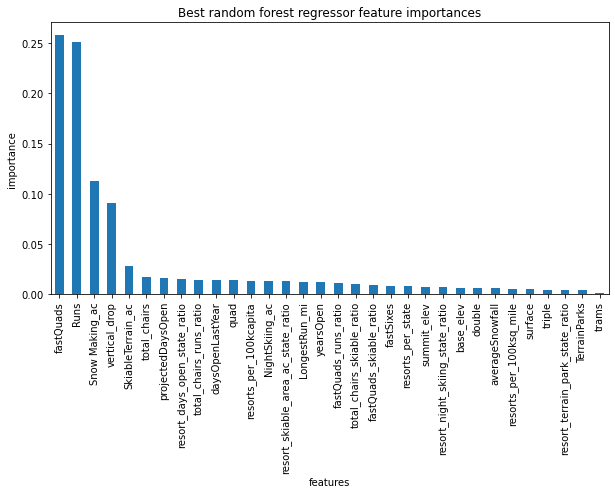

In [3]:
# Loading data 

ski_data = pd.read_csv('../data/ski_data_step3_features.csv')
big_mountain = ski_data[ski_data.Name == 'Big Mountain Resort']
# Refit model 
X = ski_data.loc[ski_data.Name != "Big Mountain Resort", model.X_columns]
y = ski_data.loc[ski_data.Name != "Big Mountain Resort", 'AdultWeekend']
model.fit(X, y)
cv_results = cross_validate(model, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
mae_mean, mae_std = np.mean(-1 * cv_results['test_score']), np.std(-1 * cv_results['test_score'])
# Expected price
X_bm = ski_data.loc[ski_data.Name == "Big Mountain Resort", model.X_columns]
y_bm = ski_data.loc[ski_data.Name == "Big Mountain Resort", 'AdultWeekend']
bm_pred = model.predict(X_bm).item()
y_bm = y_bm.values.item()
# Printed statement
print(f'Big Mountain Resort modelled price is ${bm_pred:.2f}, actual price is ${y_bm:.2f}.')
print(f'Expected mean absolute error is ${mae_mean:.2f}')

Big Mountain Resort modelled price is $95.87, actual price is $81.00.
Even with the expected mean absolute error of $10.39, this suggests there is room for an increase.


Currently, Big Mountain’s ticket price is 81 dollars. Our modelled price is 95.87 dollars. The mean absolute error is $10.39 dollars in our model. Our model indicates that Big Mountain is undercharging for admission. This model also assumes that other resorts have priced themselves according to their market value. Big Mountain should increase its ticket prices to maximize the value of its equipment. 

Big Mountain recently installed a new chair lift to help increase the distribution of visitors across the mountain. The new lift increases seasonal operating costs by 1,540,000 dollars.  Big Mountain aimed to close up to 10 of its least used runs. 
Based on our model, Big Mountain can close up to 1 run and face no drop in ticket price or revenue. Closing 2 and 3 successively reduces support for ticket price and revenue. If Big Mountain closes down 3 runs, Big Mountain can close down 4 or 5 without further loss in ticket price. Increasing the closures down to 6 leads to a large drop. If 6 of the least used runs must be permanently closed, Big Mountain can close up to 9 of the runs and face no further loss in ticket price than the loss from the initial 6 runs closure. Having data on maintenance costs will better inform the amount of revenue the company stands to lose or gain from any closure of runs.

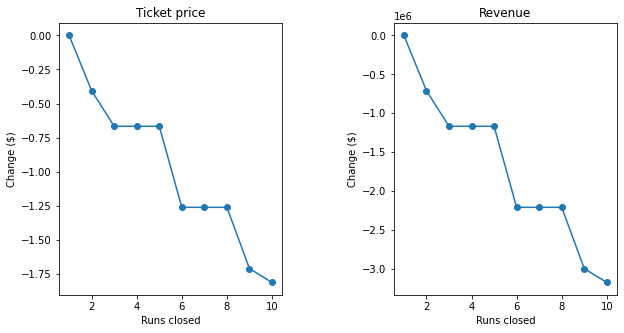

Big Mountain also aimed to increase the vertical drop by adding a run to a point 150 feet lower down but requiring the installation of an additional chair lift to bring skiers back up, without additional snow making coverage. This scenario increases support for ticket price by nearly 2 dollars. Over the season, this could be expected to amount to 3,474,638 dollars in revenue. If Big Mountain were to increase snow making coverage by two acres, it would make no difference on the increase in ticket price and revenue. Additionally, extending the longest run to 3.5 miles did not increase ticket price.  
    
I would recommend further considering the last two scenarios. While we do not know how price elastic Ski resorts are, specifically those who use Big Mountain, the company can stand to increase its ticket price to meet its market value. If the company is vocal about its new developments, it may allow the company to increase its ticket price to meet its market value and not anger as many of its patrons, since consumers can justify the hike in ticket prices to new developments. While we can predict how the length of the longest run would affect ticket prices and revenue, there is an additional marketing effect that we cannot predict. The memorability of an advertised 3.5 mile run might attract more consumers. After the developments are made and the ticket price is increased, the Resort could close 2 runs for several weeks, lower ticket prices and see how it affects attendance and revenue. If the net benefit is positive, the company can test closing 5 runs. If the outcome is financially positive, the company can close 9 runs.

In the future, it may be useful to have data on maintenance costs on all equipment and purchases within the resort. Some ski resorts may have stores which rent space from the resort to sell to consumers. It would also be valuable to see a survey done on skiers who frequent Big Mountain Ski Resort and see how a ticket price increase would affect their decision to attend. The modeled price was so much higher than its current price for a multitude of reasons. Within Montana, Big Mountain was already the most expensive Resort in terms of Adult Weekend ticket price. The resort now has a national perspective on the market value of its equipment, snow covering and other essential features in all Ski Resorts. Business executives may have placed more importance on the region of the resort to keep prices competitive among other Montana resorts. This model could give the resort confidence in increasing its admission price and building more equipment to rationalize the ticket price increase to long-time consumers/Montana natives. The model should also help business executives understand how a specific increase to any equipment or facet of the resort will have an impact on ticket price. The parameters can be changed and the model can be recreated when there are changes made to the dataframe. 